In [1]:
import seaborn
from matplotlib import pyplot
import numpy as np
import pandas as pd

In [2]:
overlap_counts = pd.read_csv("overlap_counts.tsv", delimiter="\t")
overlap_counts.head()

,Count,Overlap,Latin,ModelA,ModelB,Description
0,50277,1.000,0.880,pythia,pythia,LATIN (44219) N (2033) P (1740) S (924) CYRILL...
1,21681,0.678,0.904,pythia,llama,LATIN (19595) P (796) S (411) CJK (290) CYRILL...
2,23687,0.471,0.837,pythia,mt5,LATIN (19831) N (1977) P (415) CYRILLIC (325) ...
3,19043,0.379,0.852,pythia,xlm,LATIN (16218) N (1164) S (326) CYRILLIC (319) ...
4,25552,0.508,0.925,pythia,umt5,LATIN (23638) S (364) CYRILLIC (323) CJK (313)...


In [3]:
overlap_counts["NonLatin"] = 1 - overlap_counts["Latin"]

In [4]:
colors = seaborn.color_palette("Blues", as_cmap=True)

In [15]:
import matplotlib.ticker
import matplotlib.pyplot as plt

sFormatter1 = matplotlib.ticker.ScalarFormatter(useOffset=False, useMathText=True)
sFormatter1.set_powerlimits((0, 0))

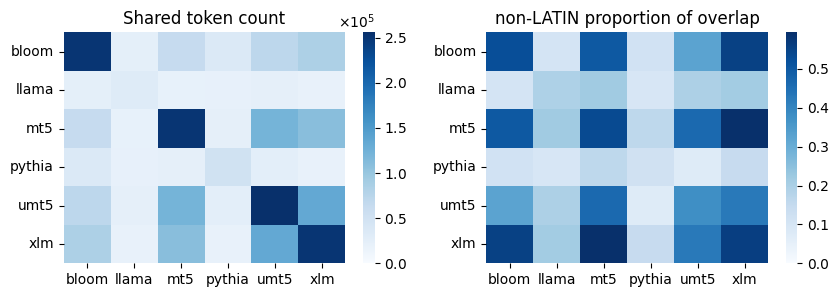

In [16]:
figure, subplots = pyplot.subplots(1, 2, figsize=(10, 3))

panel1 = seaborn.heatmap(overlap_counts.pivot(columns="ModelA", index="ModelB", values="Count"),
                    cmap=colors, vmin=0,cbar_kws={"format": sFormatter1}, ax=subplots[0])
panel1.set(xlabel=None, ylabel=None)
panel1.set(title="Shared token count")
panel3 = seaborn.heatmap(overlap_counts.pivot(columns="ModelA", index="ModelB", values="NonLatin"),
                    cmap=colors, vmin=0, ax=subplots[1])
panel3.set(xlabel=None, ylabel=None)
panel3.set(title="non-LATIN proportion of overlap")

pyplot.savefig("figures/overlap_counts.pdf", bbox_inches='tight')

In [6]:
overlap_counts["Overlap"].mean(), overlap_counts["Latin"].mean()

(0.6039444444444445, 0.7026388888888889)